In [1]:
import json
import sys
import glob
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
pandas.options.display.float_format = '{:,.4f}'.format

In [2]:
DIR = "/Users/maggicl/git/bachelorThesis/spatial_resource_waste/"

In [6]:
NAMES = {4: 'EVICT', 5: 'FAIL', 6: 'FINISH', 7: 'KILL'}

def plot_df(df, cluster, type_of_data):
    
    df = df[df["term"].isin(range(4,8))].sort_values("term")
    
    s = df.sum()
    #print("Cluster " + cluster + ":")
    df["cpu"] = df["cpu"] / s["cpu"]
    df["ram"] = df["ram"] / s["ram"]
    
    latex = df.copy()
    latex["Task termination"] = latex["term"].apply(lambda x: NAMES[x])
    del latex["term"]
    latex["% CPU"] = (latex["cpu"] * 100).round(2).apply(lambda x: "%2.02f" % x) + "%"
    del latex["cpu"]
    latex["% Memory"] = (latex["ram"] * 100).round(2).apply(lambda x: "%2.02f" % x) + "%"
    del latex["ram"]
    #print(latex.to_latex(index=False)) 

    df2 = df.copy()
    df["kind"] = "CPU"
    df["percent"] = df["cpu"] * 100
    del df["cpu"]
    del df["ram"]
    
    df2["kind"] = "Memory"
    df2["percent"] = df2["ram"] * 100
    del df2["cpu"]
    del df2["ram"]
    
    df = pd.concat([df, df2])
    
    print(df)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    
    colors = plt.cm.Spectral([0.9, 0.3, 0.8, 0.1])
    
    a = pd.plotting.table(ax, latex.set_index("Task termination"), rowColours=colors,
                         bbox=[0,-0,1,0.3])
    ax.set_ylim(bottom=-50, top=105)
    
    bottom = [0, 0]
    lines = []
    for t in [4,5,6,7]:
        dft = df[df.term==t]
        line = plt.bar(x=dft["kind"], bottom=bottom, height=dft["percent"], 
                       color=colors[t-4], width=0.85)
        #ax.bar_label(line, label_type='center', fmt="%.02f%%")
        lines.append(line)
        bottom += df[df.term==t]["percent"].values
    #plt.legend(lines, ["EVICT", "FAIL", "FINISH", "KILL"],
    #          bbox_to_anchor=(1,1))
    if cluster == "2011":
        plt.title("2011 data (%s resources)" % type_of_data)
    elif cluster == "all":
        plt.title("2019 data (%s resources)" % type_of_data)
    else:
        plt.title("Cluster %s (%s resources)" % (cluster.upper(), type_of_data))
    
    ax.set_xticks([])
    ax.set_yticks([0,20,40,60,80,100])
    fig.savefig('../report/figures/spatial_resource_waste/%s-%s.pgf' % 
                (type_of_data, cluster), bbox_inches='tight')
    plt.show()
    

a
   term    kind    percent
3     4     CPU  13.534758
2     5     CPU   2.295446
1     6     CPU   1.406182
5     7     CPU  82.763613
3     4  Memory  11.944255
2     5  Memory   2.868907
1     6  Memory   1.118353
5     7  Memory  84.068484


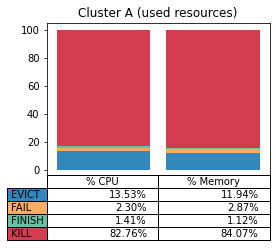

b
   term    kind    percent
3     4     CPU   4.846675
2     5     CPU   6.311480
1     6     CPU   2.594542
5     7     CPU  86.247303
3     4  Memory   7.346297
2     5  Memory   8.423371
1     6  Memory   1.228843
5     7  Memory  83.001490


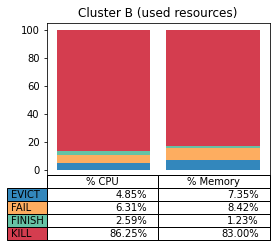

c
   term    kind    percent
3     4     CPU   8.238472
2     5     CPU   1.233646
1     6     CPU   2.950120
5     7     CPU  87.577761
3     4  Memory   8.076928
2     5  Memory   2.089036
1     6  Memory   3.337954
5     7  Memory  86.496082


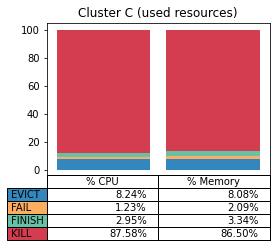

d
   term    kind    percent
3     4     CPU   7.638602
2     5     CPU   3.044086
1     6     CPU   0.870956
5     7     CPU  88.446357
3     4  Memory   9.109782
2     5  Memory   3.940516
1     6  Memory   0.895734
5     7  Memory  86.053968


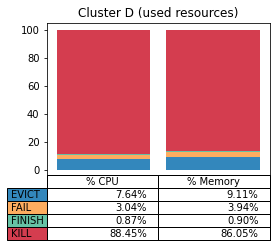

   term    kind    percent
1     4     CPU   8.528859
2     5     CPU   3.165632
3     6     CPU   2.020153
4     7     CPU  86.285355
1     4  Memory   9.025691
2     5  Memory   4.451117
3     6  Memory   1.660565
4     7  Memory  84.862627


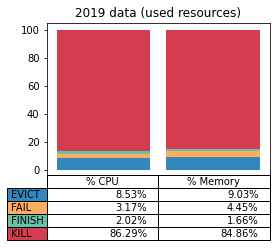

   term    kind    percent
0     4     CPU   2.850959
1     5     CPU   0.058594
2     6     CPU   0.000102
3     7     CPU  97.090345
0     4  Memory   3.424137
1     5  Memory   0.070269
2     6  Memory   0.000152
3     7  Memory  96.505443


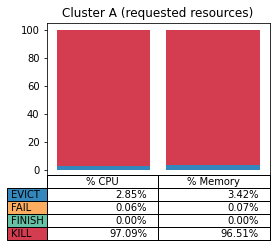

   term    kind    percent
0     4     CPU   0.003693
1     5     CPU   0.003359
2     6     CPU   0.013934
3     7     CPU  99.979014
0     4  Memory   0.005485
1     5  Memory   0.005801
2     6  Memory   0.020615
3     7  Memory  99.968099


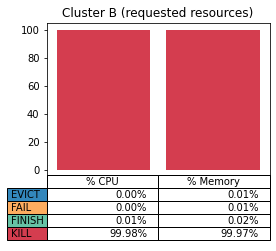

   term    kind    percent
0     4     CPU   0.010445
1     5     CPU   0.001528
2     6     CPU   0.018237
3     7     CPU  99.969789
0     4  Memory   0.008770
1     5  Memory   0.001830
2     6  Memory   0.021328
3     7  Memory  99.968072


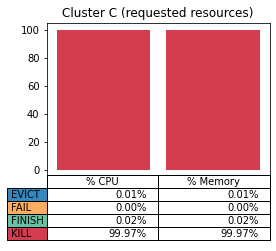

   term    kind    percent
0     4     CPU   0.048160
1     5     CPU   0.024785
2     6     CPU   0.099707
3     7     CPU  99.827348
0     4  Memory   0.006485
1     5  Memory   0.002827
2     6  Memory   0.013246
3     7  Memory  99.977441


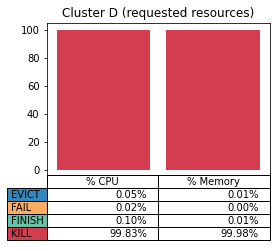

   term    kind    percent
0     4     CPU   0.362143
1     5     CPU   0.051381
2     6     CPU   1.672449
3     7     CPU  97.914027
0     4  Memory   0.321327
1     5  Memory   0.047385
2     6  Memory   1.310576
3     7  Memory  98.320711


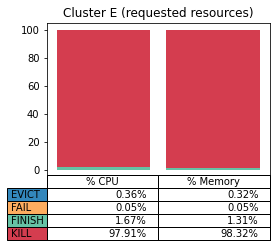

   term    kind    percent
0     4     CPU   0.008458
1     5     CPU   0.000967
2     6     CPU   0.014082
3     7     CPU  99.976494
0     4  Memory   0.014918
1     5  Memory   0.002286
2     6  Memory   0.024097
3     7  Memory  99.958699


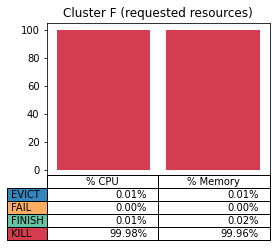

   term    kind    percent
0     4     CPU   0.123373
1     5     CPU   0.015890
2     6     CPU   0.638210
3     7     CPU  99.222527
0     4  Memory   0.081149
1     5  Memory   0.012577
2     6  Memory   0.535009
3     7  Memory  99.371265


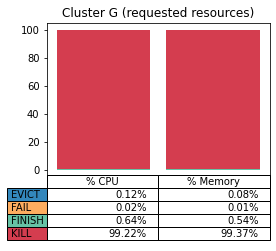

   term    kind    percent
0     4     CPU   0.007628
1     5     CPU   0.001086
2     6     CPU   0.019818
3     7     CPU  99.971468
0     4  Memory   0.000769
1     5  Memory   0.000147
2     6  Memory   0.001917
3     7  Memory  99.997168


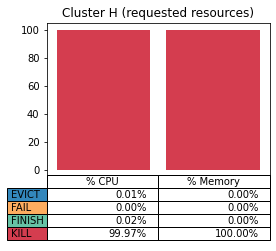

   term    kind    percent
0     4     CPU   2.727769
1     5     CPU   0.056169
2     6     CPU   0.001204
3     7     CPU  97.214858
0     4  Memory   3.042415
1     5  Memory   0.062556
2     6  Memory   0.001257
3     7  Memory  96.893772


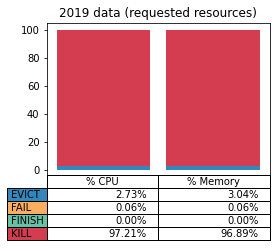

   term    kind  percent
0     4     CPU     28.2
1     5     CPU     31.7
2     6     CPU     13.9
3     7     CPU     26.2
0     4  Memory     30.4
1     5  Memory     23.5
2     6  Memory     17.3
3     7  Memory     28.8


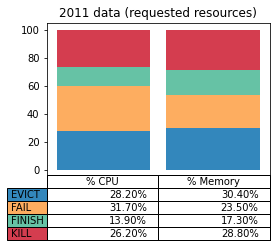

   term    kind  percent
0     4     CPU     19.2
1     5     CPU     13.7
2     6     CPU     23.2
3     7     CPU     43.9
0     4  Memory     21.0
1     5  Memory     14.2
2     6  Memory     32.1
3     7  Memory     32.7


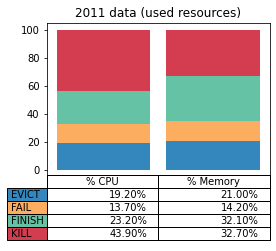

In [7]:

dft = None
for cluster in "abcd":
    print(cluster)
    df = pd.read_csv(glob.glob(DIR + cluster + "_actual/part-*")[0], header=None,
                    names=["term", "cpu", "ram"])
    plot_df(df, cluster, "used")
    if dft is None:
        dft = df
    else:
        dft = dft.append(df)

dft = dft.groupby("term").sum().reset_index()
plot_df(dft, "all", "used")

dft = None
for cluster in "abcdefgh":
    data = None
    with open(DIR + cluster + "_res_micros_requested.json", "r") as f:
        data = json.loads(f.read())
    dfd = {'term': [], 'cpu': [], 'ram': []}
    for term in [4,5,6,7]:
        dfd['term'].append(term)
        dfd['cpu'].append(float(data["cpu-" + ("None" if term == -1 else str(term))]))
        dfd['ram'].append(float(data["ram-" + ("None" if term == -1 else str(term))]))
    df = pd.DataFrame(dfd, columns=['term', 'cpu', 'ram'])
    if dft is None:
        dft = df
    else:
        dft = dft.append(df)
    plot_df(df, cluster, "requested")
    
dft = dft.groupby("term").sum().reset_index()
plot_df(dft, "all", "requested")

dfr2011 = {'term': [4,5,6,7], 'cpu': [28.2, 31.7, 13.9, 26.2], 'ram': [30.4,23.5, 17.3, 28.8]}
dfr2011 = pd.DataFrame(dfr2011, columns=dfr2011.keys())
dfa2011 = {'term': [4,5,6,7],'cpu': [19.2, 13.7, 23.2, 43.9], 'ram': [21.0,14.2,32.1,32.7]}
dfa2011 = pd.DataFrame(dfa2011, columns=dfa2011.keys())

plot_df(dfr2011, "2011", "requested")
plot_df(dfa2011, "2011", "used")